<a href="https://colab.research.google.com/github/JayV1I/Aulas-pucc/blob/main/Atividade_Pr%C3%A1tica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome/RA:

# Exercício 1) Considere as amostras com 8 observações e 3 variáveis apresentadas a seguir:

$\begin{array}{ccc}  3 & 5 & 6 & 4 & 8 & 9 & 6 & 7 \\  6 & 11 & 11 & 9 & 15 & 16 & 10 & 12 \\  14 & 9 & 9 & 13 & 2 & 2 & 9 & 5 \\   \end{array}$

a) Construa o gráfico de dispersão dos pontos das variáveis $x_1$ e $x_2$, $x_1$ e $x_3$, $x_2$ e $x_3$.
Comente sobre sua aparência.

b) Calcule: $\bar{X}$ , S e R e interprete os valores em R.

# Exercício 2) Considere o DataSet Índice Mineiro de Responsabilidade Social

a) Considere a microrregião de Patrocínio. Analise a distância dos municipios considerando os índices de mortalidade (ou seja, variáveis "tx_mort_acid", "tx_mort_hom", "tx_mort_mama", "tx_mort_inf") e determine os municipios mais próximos e os mais distantes.

Escolha uma das distâncias vistas em aula para realizar os cálculos. Justifique sua escolha.

b) Refaça o experimento anterior para os atributos de escolarização (ou seja, as variáveis "prop_fund", "perc_med")

Escolha uma das distâncias vistas em aula para realizar os cálculos. Justifique sua escolha.

c) Escolha uma nova microrregião e utilizando a distância de Mahalanobis analise a distância dos municípios considerando os índices de mortalidade (ou seja, variáveis "tx_mort_acid", "tx_mort_hom", "tx_mort_mama", "tx_mort_inf") e determine os mais próximas e as mais distantes.

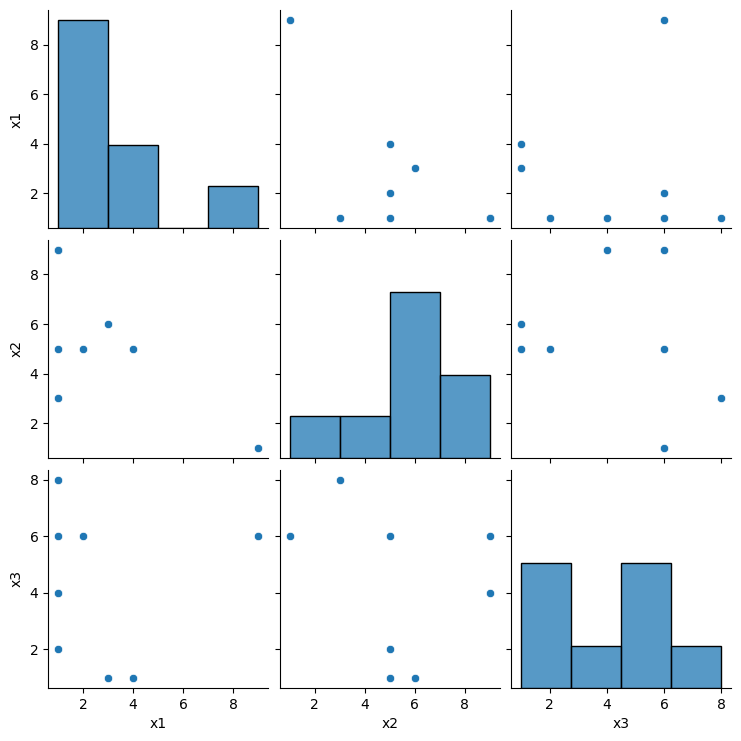

(x1    2.750
 x2    5.375
 x3    4.250
 dtype: float64,
           x1        x2        x3
 x1  7.642857 -5.035714 -0.071429
 x2 -5.035714  7.410714 -1.678571
 x3 -0.071429 -1.678571  7.071429,
           x1        x2        x3
 x1  1.000000 -0.669119 -0.009716
 x2 -0.669119  1.000000 -0.231876
 x3 -0.009716 -0.231876  1.000000)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = np.array([
    [3, 6, 1],
    [4, 5, 1],
    [1, 9, 6],
    [1, 9, 4],
    [1, 3, 8],
    [1, 5, 2],
    [9, 1, 6],
    [2, 5, 6]
])

df = pd.DataFrame(data, columns=["x1", "x2", "x3"])

sns.pairplot(df)
plt.show()

mean_values = df.mean()

cov_matrix = df.cov()

corr_matrix = df.corr()

mean_values, cov_matrix, corr_matrix


x1 e 𝑥2x2:
 parece haver uma correlação negativa.

𝑥1x1 e
𝑥3x3:
não apresentam uma relação clara.

𝑥2x2 e
𝑥3x3:
possível correlação negativa fraca.


---





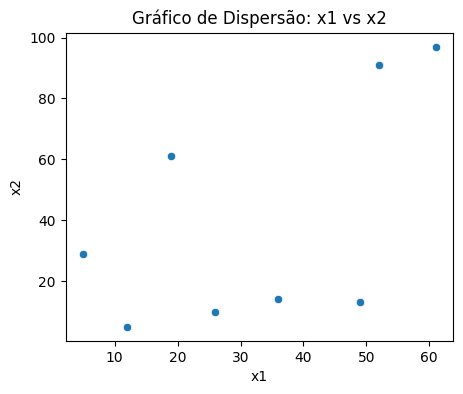

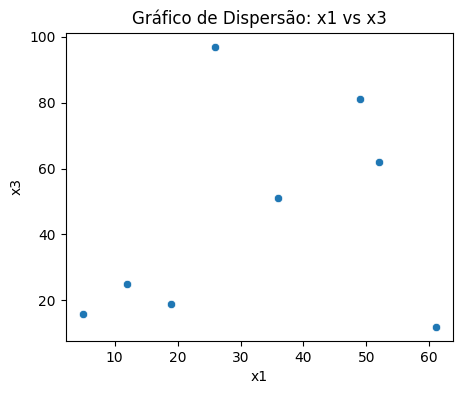

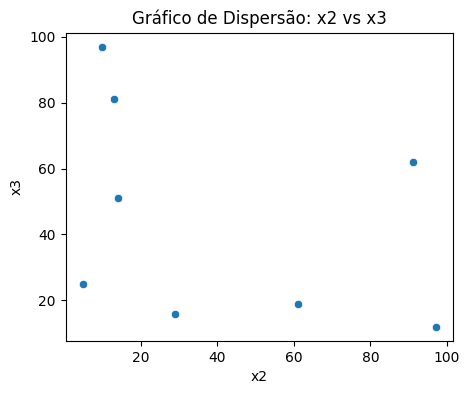

In [5]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=df["x1"], y=df["x2"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Gráfico de Dispersão: x1 vs x2")
plt.show()

plt.figure(figsize=(5, 4))
sns.scatterplot(x=df["x1"], y=df["x3"])
plt.xlabel("x1")
plt.ylabel("x3")
plt.title("Gráfico de Dispersão: x1 vs x3")
plt.show()

plt.figure(figsize=(5, 4))
sns.scatterplot(x=df["x2"], y=df["x3"])
plt.xlabel("x2")
plt.ylabel("x3")
plt.title("Gráfico de Dispersão: x2 vs x3")
plt.show()


***exercícios 2)***

***A)A distância de Mahalanobis é a escolha ideal para a questão pois:***

Lida com variáveis em escalas diferentes.

Considera a correlação entre as variáveis.

É robusta e adequada para dados multivariados.

In [18]:
from scipy.spatial.distance import pdist, squareform

dados = pd.read_csv("/content/imrs.csv")

patrocinio = dados[dados["nome_micro"] == "Patrocínio"]

mortalidade = patrocinio[["tx_mort_acid_15_29", "tx_mort_hom_15_29", "tx_mort_mama", "tx_mort_inf"]]

dist_euclidiana = pdist(mortalidade, metric="euclidean")
dist_matrix = squareform(dist_euclidiana)

print("Matriz de distância euclidiana:")
print(dist_matrix)

min_dist = np.min(dist_matrix[dist_matrix > 0])
max_dist = np.max(dist_matrix)

print(f"\n Menor distância: {min_dist}")
print(f"Maior distância: {max_dist}")

Matriz de distância euclidiana:
[[  0.          40.52749931  36.46       187.22650587  97.79699433
   66.53        69.78068071  49.44519694  84.56595887  66.53
   68.08965413]
 [ 40.52749931   0.          74.70045649 215.77934169 130.26590767
   36.1823562   34.84576588  11.90067645  54.22519156  36.1823562
   33.89334153]
 [ 36.46        74.70045649   0.         155.42628124  64.57832221
  102.99       105.11918284  82.12302174 110.99536477 102.99
  104.00432779]
 [187.22650587 215.77934169 155.42628124   0.          90.9215596
  248.57362089 242.32984649 221.00060679 241.17040677 248.57362089
  244.09813948]
 [ 97.79699433 130.26590767  64.57832221  90.9215596    0.
  162.0451326  159.15038957 136.4323488  160.50038598 162.0451326
  159.76090667]
 [ 66.53        36.1823562  102.99       248.57362089 162.0451326
    0.          21.05        38.09901049  67.61681226   0.
   14.49      ]
 [ 69.78068071  34.84576588 105.11918284 242.32984649 159.15038957
   21.05         0.          36.1

***b) Calcular a distância euclidiana:***


A distância euclidiana entre dois pontos
i
i e
j
j
A distância euclidiana é simples e amplamente utilizada para dados numéricos.

É adequada quando as variáveis estão na mesma escala (ou foram padronizadas) e vão de 0 até 1

In [15]:

escolarizacao = patrocinio[["prop_fund_25m", "perc_med_25m"]]

dist_euclidiana_escolarizacao = pdist(escolarizacao, metric="euclidean")
dist_matrix_escolarizacao = squareform(dist_euclidiana_escolarizacao)

print("Matriz de distância euclidiana (escolarização):")
print(dist_matrix_escolarizacao)

min_dist_escolarizacao = np.min(dist_matrix_escolarizacao[dist_matrix_escolarizacao > 0])
max_dist_escolarizacao = np.max(dist_matrix_escolarizacao)

print(f"\n Menor distância (escolarização): {min_dist_escolarizacao}")
print(f"Maior distância (escolarização): {max_dist_escolarizacao}")

Matriz de distância euclidiana (escolarização):
[[ 0.          7.54069625  5.33877327  2.00359677  6.08739682 15.94073085
   5.33689985  8.29231572 15.36522047  8.66741599  3.85591753]
 [ 7.54069625  0.          6.42958786  8.06863681  1.77654158  8.82498725
   3.66436898  2.71064568  8.84692602  2.33452351  5.17014507]
 [ 5.33877327  6.42958786  0.          4.05177739  4.71581382 15.07562271
   2.7784888   8.69252552 15.27064177  8.60706686  2.02869416]
 [ 2.00359677  8.06863681  4.05177739  0.          6.38839573 16.80096723
   5.06565889  9.37341453 16.46306168  9.61607508  3.29607342]
 [ 6.08739682  1.77654158  4.71581382  6.38839573  0.         10.59641921
   1.93775643  4.04411919 10.60181117  3.89539472  3.39689564]
 [15.94073085  8.82498725 15.07562271 16.80096723 10.59641921  0.
  12.40557939  7.70833315  2.24162887  7.27367857 13.99326981]
 [ 5.33689985  3.66436898  2.7784888   5.06565889  1.93775643 12.40557939
   0.          5.9464275  12.5112949   5.83177503  1.78538511]
 

***C) Distancia de Mahalanobis. Exemplo escolhido, Uberlandia***

In [14]:
from scipy.spatial.distance import mahalanobis

#(Uberlândia)
uberlandia = dados[dados["nome_micro"] == "Uberlândia"]

mortalidade_uberlandia = uberlandia[["tx_mort_acid_15_29", "tx_mort_hom_15_29", "tx_mort_mama", "tx_mort_inf"]]

cov_matrix = np.cov(mortalidade_uberlandia, rowvar=False)
mean_values = np.mean(mortalidade_uberlandia, axis=0)
#(Mahalanobis)
def mahalanobis_distance(x, mean, cov):
    return np.sqrt((x - mean).T @ np.linalg.inv(cov) @ (x - mean))

n = mortalidade_uberlandia.shape[0]

dist_mahalanobis = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        dist_mahalanobis[i, j] = mahalanobis_distance(
            mortalidade_uberlandia.iloc[i], mortalidade_uberlandia.iloc[j], cov_matrix
        )

print("Matriz de distância de Mahalanobis:")
print(dist_mahalanobis)

min_dist_mahalanobis = np.min(dist_mahalanobis[dist_mahalanobis > 0])
max_dist_mahalanobis = np.max(dist_mahalanobis)

print(f"Menor distância de Mahalanobis: {min_dist_mahalanobis}")
print(f"Maior distância de Mahalanobis: {max_dist_mahalanobis}")

Matriz de distância de Mahalanobis:
[[0.         2.73431409 3.58272817 2.96730194 2.7215271  3.6233871
  0.36021156 2.92428145 2.47529411 2.85051618]
 [2.73431409 0.         3.47879752 0.73878803 0.84858015 2.96542403
  2.54890025 2.49586408 1.25115685 2.87183862]
 [3.58272817 3.47879752 0.         3.68164696 2.91233332 4.15408568
  3.63825464 3.29850244 3.271071   3.79124582]
 [2.96730194 0.73878803 3.68164696 0.         0.76931364 3.70421206
  2.75151595 2.76624882 1.46924645 3.08098596]
 [2.7215271  0.84858015 2.91233332 0.76931364 0.         3.49562726
  2.55231589 2.46701272 1.30497245 2.87609472]
 [3.6233871  2.96542403 4.15408568 3.70421206 3.49562726 0.
  3.62915001 3.39159765 3.18881441 3.77288171]
 [0.36021156 2.54890025 3.63825464 2.75151595 2.55231589 3.62915001
  0.         3.04321388 2.43444003 3.00419138]
 [2.92428145 2.49586408 3.29850244 2.76624882 2.46701272 3.39159765
  3.04321388 0.         1.31916504 0.70197689]
 [2.47529411 1.25115685 3.271071   1.46924645 1.30497